<a href="https://colab.research.google.com/github/Luthfan05/ML-Deteksi-Penipuan-dengan-DT-LR-dan-SVM/blob/main/Mendeteksi_Penipuan_pada_Kartu_Kredit_DT%2C_LR%2C_dan_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mengimport dataset dari Kaggle ke Google Colab

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023

 90% 129M/143M [00:00<00:00, 167MB/s]
100% 143M/143M [00:00<00:00, 185MB/s]


Mengekstrak Data yang telah di-import dari Kaggle

In [ ]:
!unzip credit-card-fraud-detection-dataset-2023.zip

Archive:  credit-card-fraud-detection-dataset-2023.zip
  inflating: creditcard_2023.csv     


In [ ]:
import pandas as pd

data = pd.read_csv('/content/creditcard_2023.csv')

Melihat 5 data teratas

In [ ]:
print('Shape of our Dataset -',data.shape)
data.head()

Shape of our Dataset - (568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


Melihat informasi data dari nama kolom, nilai yang kosong, dan tipe data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


Mengecek data apakah terdapat data yang sama.

In [ ]:
data.duplicated().any()

False

Menunjukkan korelasi antara variabel-variabel dalam dataset.

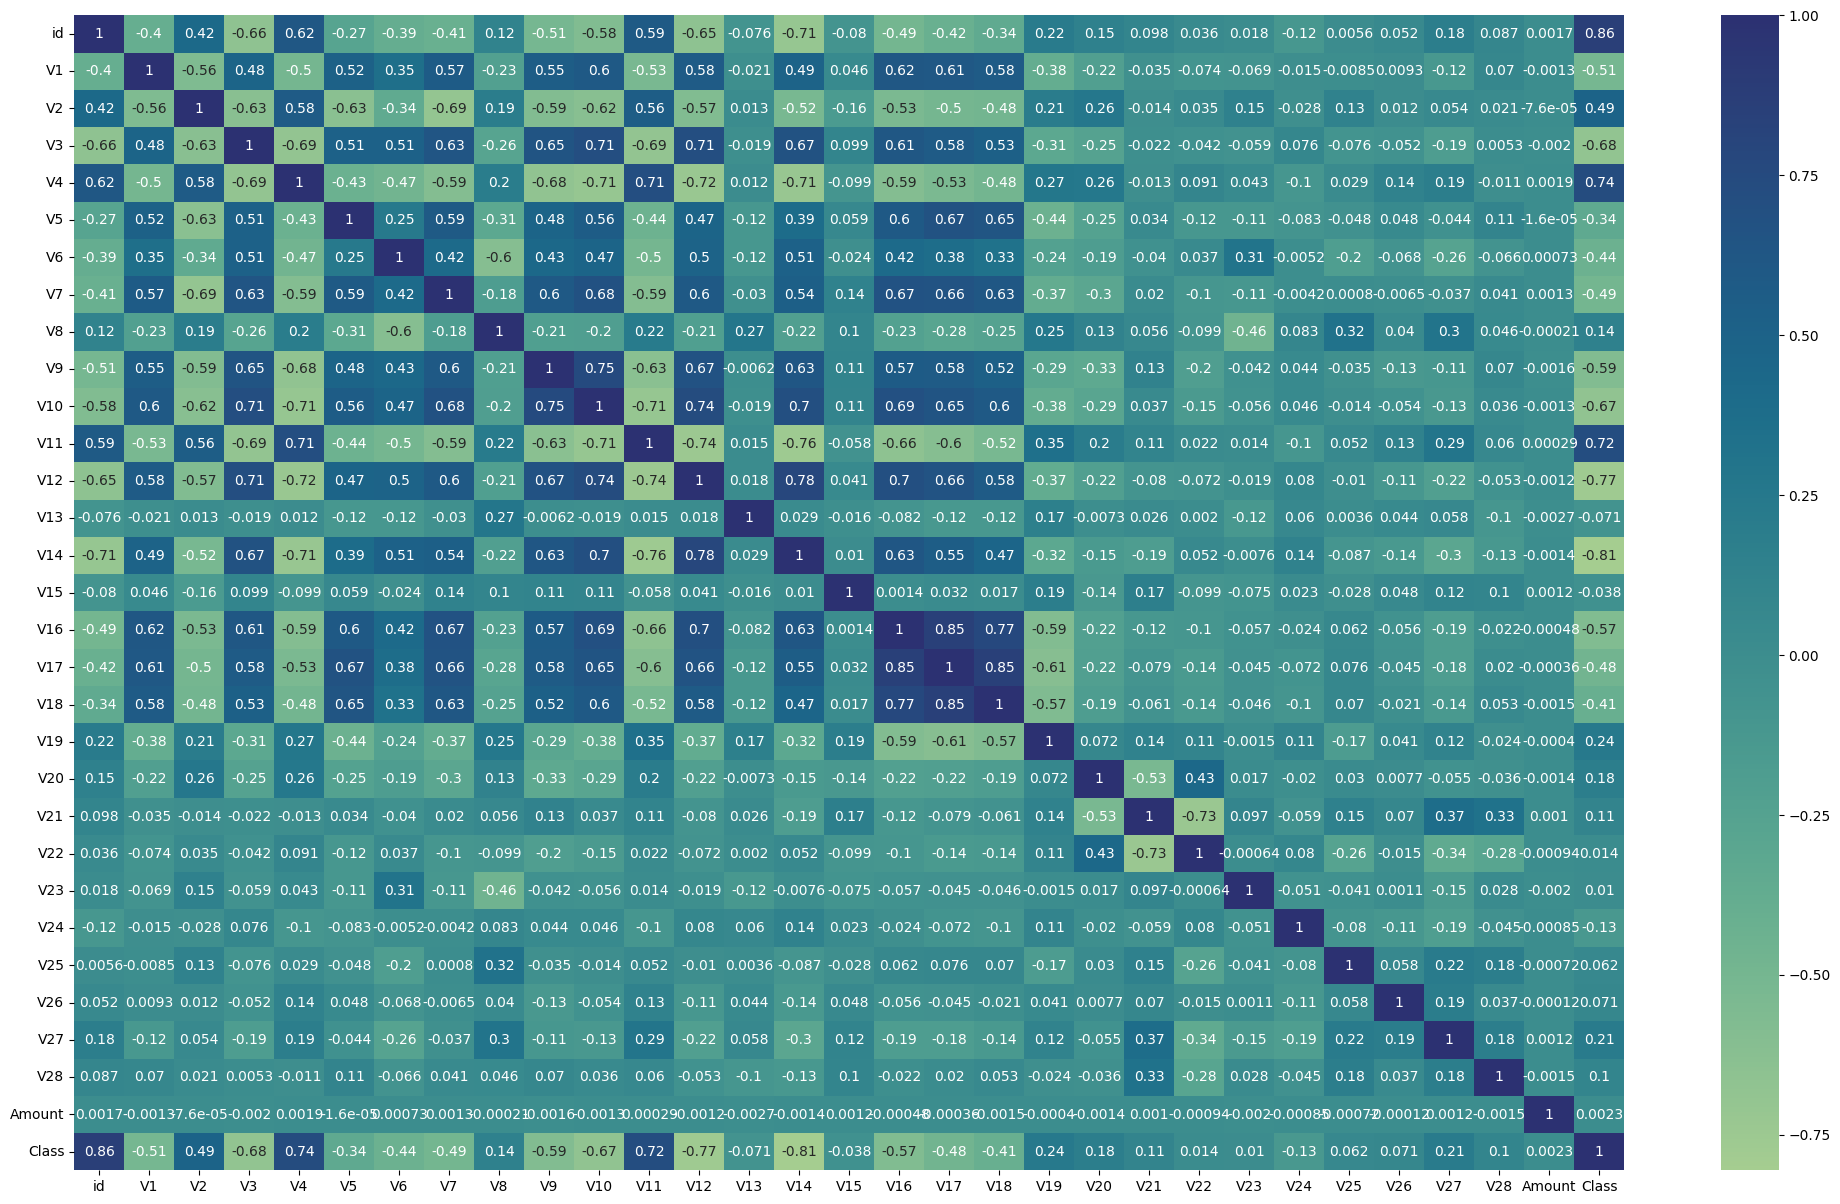

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

paper = plt.figure(figsize=[25,15])
sns.heatmap(data.corr(),cmap='crest',annot=True)
plt.show()

Observasi

*   Beberapa fitur memiliki korelasi tinggi antara fitur-fitur lainnya.
*   V17 dan V18 memiliki korelasi yang tinggi.
*   V16 dan V17 memiliki korelasi yang tinggi.
*   V14 memiliki korelasi negatif dengan V4.
*   V12 juga memiliki korelasi negatif dengan V10 dan V11.
*   V11 memiliki korelasi negatif dengan V10 dan korelasi positif dengan V4.
*   V3 memiliki korelasi positif dengan V10 dan V12.
*   V9 dan V10 juga memiliki korelasi positif.

In [ ]:
#sns.pairplot(data=data,hue='Class')

Menghitung kemiringan (skewness) dari setiap kolom dalam dataset

In [ ]:
data.skew()

id       -6.579536e-16
V1       -8.341717e-02
V2       -1.397952e+00
V3        1.462221e-02
V4       -4.416893e-02
V5        1.506414e+00
V6       -2.016110e-01
V7        1.902687e+01
V8        2.999722e-01
V9        1.710575e-01
V10       7.404136e-01
V11      -2.089056e-02
V12       6.675895e-02
V13       1.490639e-02
V14       2.078348e-01
V15       1.123298e-02
V16       2.664070e-01
V17       3.730610e-01
V18       1.291911e-01
V19      -1.017123e-02
V20      -1.556460e+00
V21      -1.089833e-01
V22       3.185295e-01
V23      -9.968746e-02
V24       6.608974e-02
V25       2.300804e-02
V26      -1.895874e-02
V27       2.755452e+00
V28       1.724978e+00
Amount    1.655585e-03
Class     0.000000e+00
dtype: float64

Membuat diagram boxplot (box-and-whisker plot) dari kolom 'Amount' dalam dataset.

Diagram boxplot menyediakan visualisasi ringkas tentang sebaran statistik deskriptif, seperti kuartil, median, dan outlier, dari data dalam kolom 'Amount'.

<Axes: >

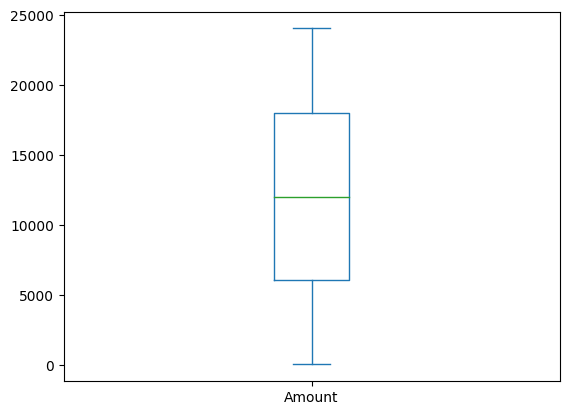

In [ ]:
data['Amount'].plot.box()

Membuat plot distribusi kernel (kernel density plot) dari kolom 'Amount' dalam dataset

<ipython-input-14-2ada823b135a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data['Amount'], shade=True)


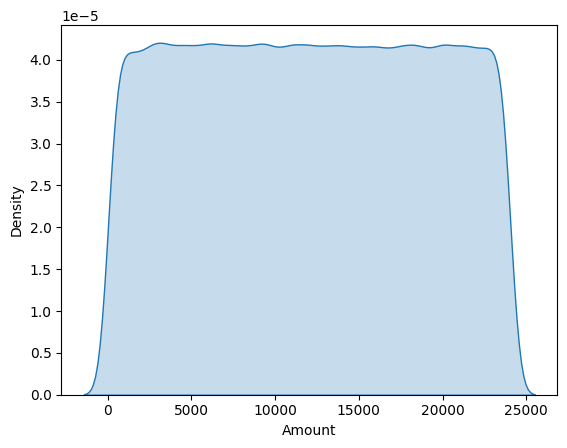

In [ ]:
sns.kdeplot(data=data['Amount'], shade=True)
plt.show()

Hasil observasi
Tabel 'Amount' terdistribusi cukup normal.

Melihat fitur V1, V10, V23, dan V12.

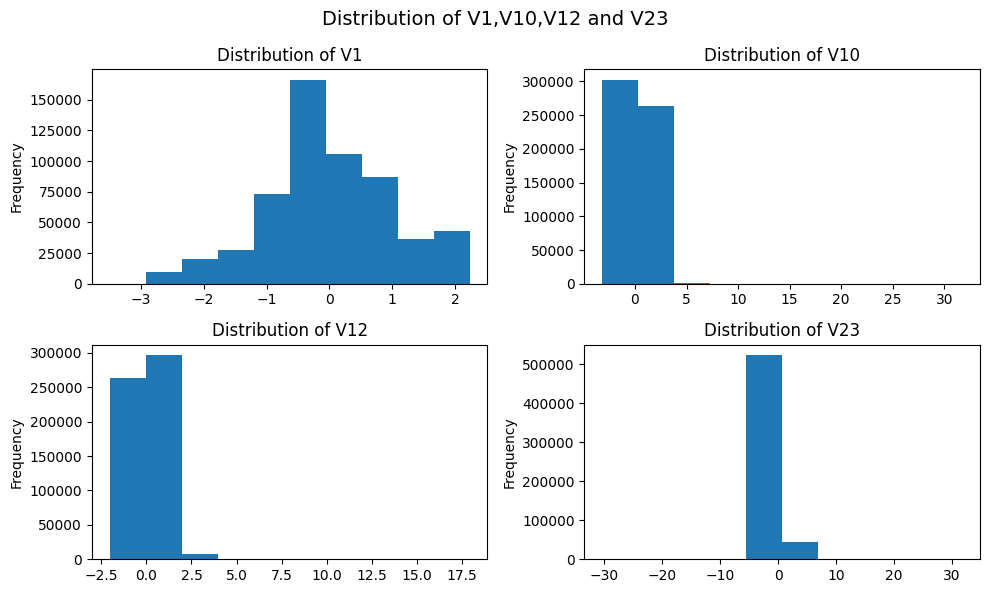

In [ ]:
paper, axes = plt.subplots(2, 2, figsize=(10, 6))
data['V1'].plot(kind='hist', ax=axes[0,0], title='Distribution of V1')
data['V10'].plot(kind='hist', ax=axes[0,1], title='Distribution of V10')
data['V12'].plot(kind='hist', ax=axes[1,0], title='Distribution of V12')
data['V23'].plot(kind='hist', ax=axes[1,1], title='Distribution of V23')
plt.suptitle('Distribution of V1,V10,V12 and V23',size=14)
plt.tight_layout()
plt.show()

Kelas distribusi yang terkena penipuan dan tidak terkena penipuan

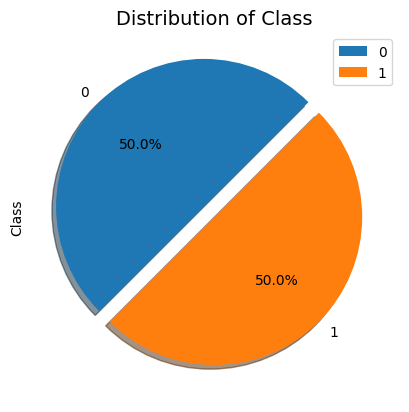

In [ ]:
data['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()

In [ ]:
data = data.drop('id', axis=1)

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


Membagi data

In [ ]:
x = data.iloc[:,1:30]
y = data.iloc[:,-1]


Standarisasi semua fitur kita untuk membawa mereka ke skala yang sama.
Mnggunakan metode penskalaan standar (standard scaler).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

sc = StandardScaler()

In [ ]:
x_scaled = sc.fit_transform(x)

In [ ]:
x_scaled_df = pd.DataFrame(x_scaled,columns=x.columns)

In [ ]:
x_scaled_df.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,-1.0
1,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,-1.0
2,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,-1.0
3,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,-1.0
4,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,-1.0


Modeling ML

Membagi dataset menjadi data train dan data test.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,y,test_size=0.2,random_state=15,stratify= y)

Mendefinisikan Fungsi untuk mengecek Model Accuracy,Classification Report dan Confusion Matrix

In [ ]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

Akurasi data Train

In [ ]:
model_eval(y_train,preds_dtree_train)

Model Accuracy is:  1.0
[[227452      0]
 [     0 227452]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       1.00      1.00      1.00    227452

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



Akurasi data Test

In [ ]:
model_eval(y_test,preds_dtree_test)

Model Accuracy is:  1.0
[[56697   166]
 [   65 56798]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



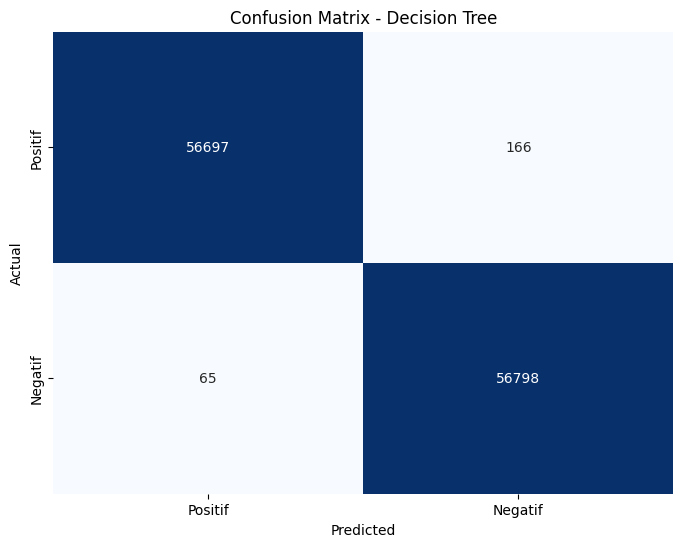

In [ ]:
# Evaluasi model pada data uji
conf_matrix_dtree = confusion_matrix(y_test, preds_dtree_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dtree, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Positif', 'Negatif'], yticklabels=['Positif', 'Negatif'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
preds_lr_train = lr.predict(x_train)
preds_lr_test = lr.predict(x_test)

Akurasi data Train

In [ ]:
model_eval(y_train,preds_lr_train)

Model Accuracy is:  0.96
[[222578   4874]
 [ 11050 216402]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    227452
           1       0.98      0.95      0.96    227452

    accuracy                           0.96    454904
   macro avg       0.97      0.96      0.96    454904
weighted avg       0.97      0.96      0.96    454904



Akurasi data Test

In [ ]:
model_eval(y_test, preds_lr_test)

Model Accuracy is:  0.96
[[55614  1249]
 [ 2781 54082]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



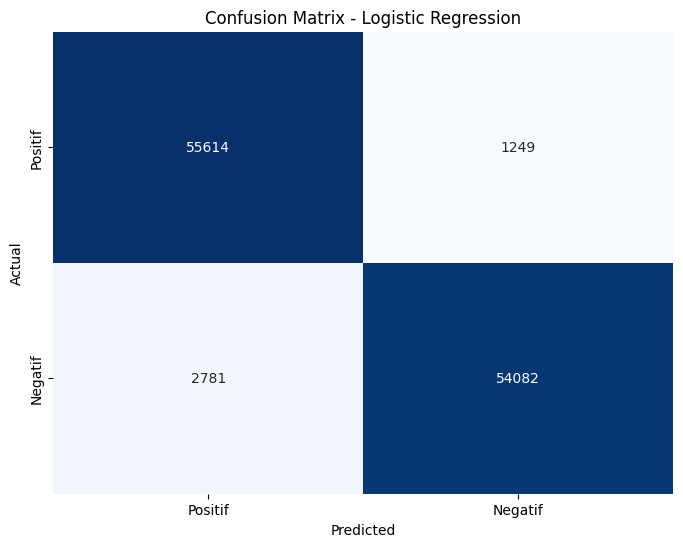

In [ ]:
# Evaluasi model pada data uji
conf_matrix_lr = confusion_matrix(y_test, preds_lr_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Positif', 'Negatif'], yticklabels=['Positif', 'Negatif'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**SVM**

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [ ]:
preds_svm_train = svm.predict(x_train)
preds_svm_test = svm.predict(x_test)

Akurasi data Train

In [ ]:
model_eval(y_train,preds_svm_train)

Model Accuracy is:  1.0
[[226716    736]
 [   564 226888]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       1.00      1.00      1.00    227452

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



Akurasi data Test

In [ ]:
model_eval(y_test,preds_svm_test)

Model Accuracy is:  1.0
[[56666   197]
 [  121 56742]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



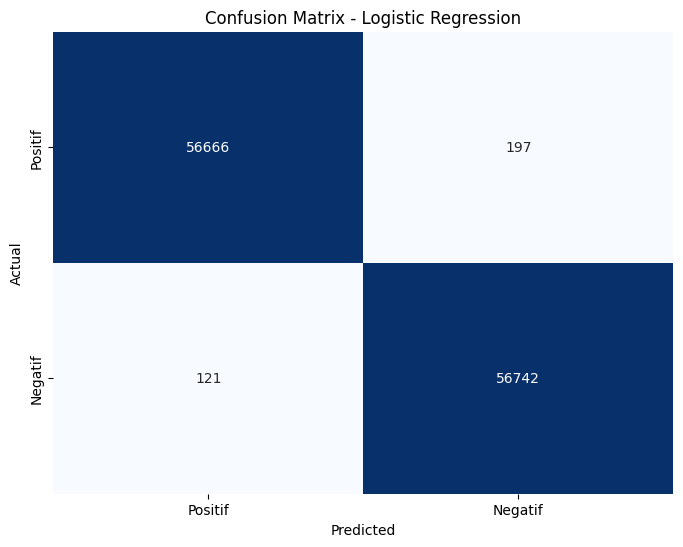

In [ ]:
# Evaluasi model pada data uji
conf_matrix_svm = confusion_matrix(y_test, preds_svm_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Positif', 'Negatif'], yticklabels=['Positif', 'Negatif'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()